<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data to Pandas DataFrame

In [2]:
df = pd.read_csv('real-estate.csv')

## Droping Unnecessary Columns

In [3]:
useless = ['No', 'X1 transaction date']
df = df.drop(columns=useless)

In [4]:
df

X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
0                                 10     24.98298     121.54024   
1                                  9     24.98034     121.53951   
2                                  5     24.98746     121.54391   
3                                  5     24.98746     121.54391   
4                                  5     24.97937     121.54245   
..                               ...          ...           ...   
409                                0     24.94155     121.50381   
410                                9     24.97433     121.54310   
411                                7     24.97923     121.53986   
412                                5     24.96674     121.54067   
413                                9     24.97433     121.54310   

     Y house price of unit area  
0                          37.9  
1                          42.2  
2                          47.3  
3                          54.8  
4                          43.1  
..                          ...  
409                        15.4  
410                        50.0  
411                        40.6  
412                        52.5  
413                        63.9  

[414 rows x 6 columns]

## Splitting Data to Train and Test

In [5]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
y_train

192     42.7
234     23.9
5       32.1
45      38.3
245     40.8
       ...  
71      40.8
106     47.1
270    117.5
348     53.7
102     54.4
Name: Y house price of unit area, Length: 331, dtype: float64

## Visualizing Data Distribution and Correlation

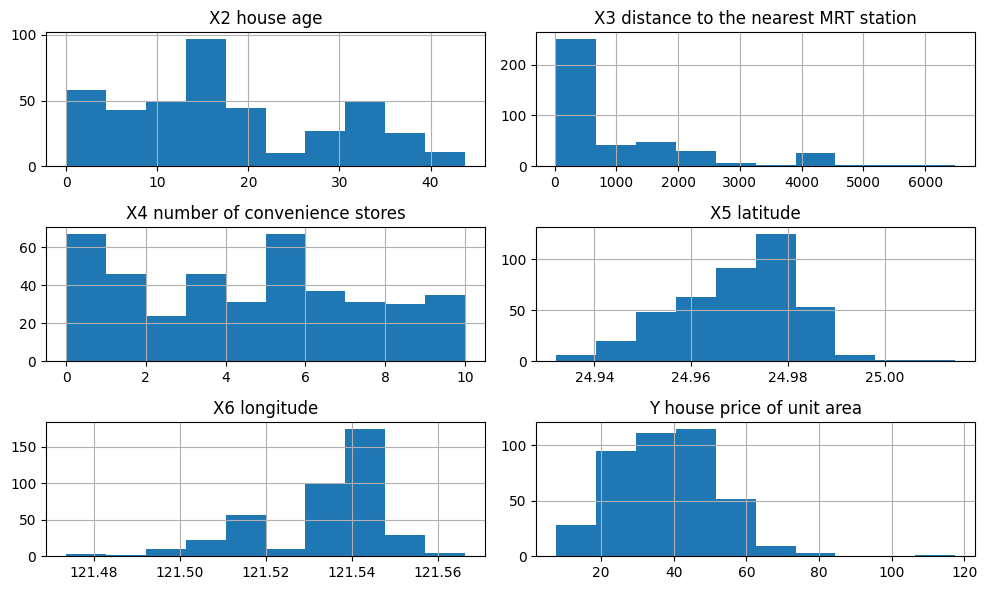

In [8]:
# histogram
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

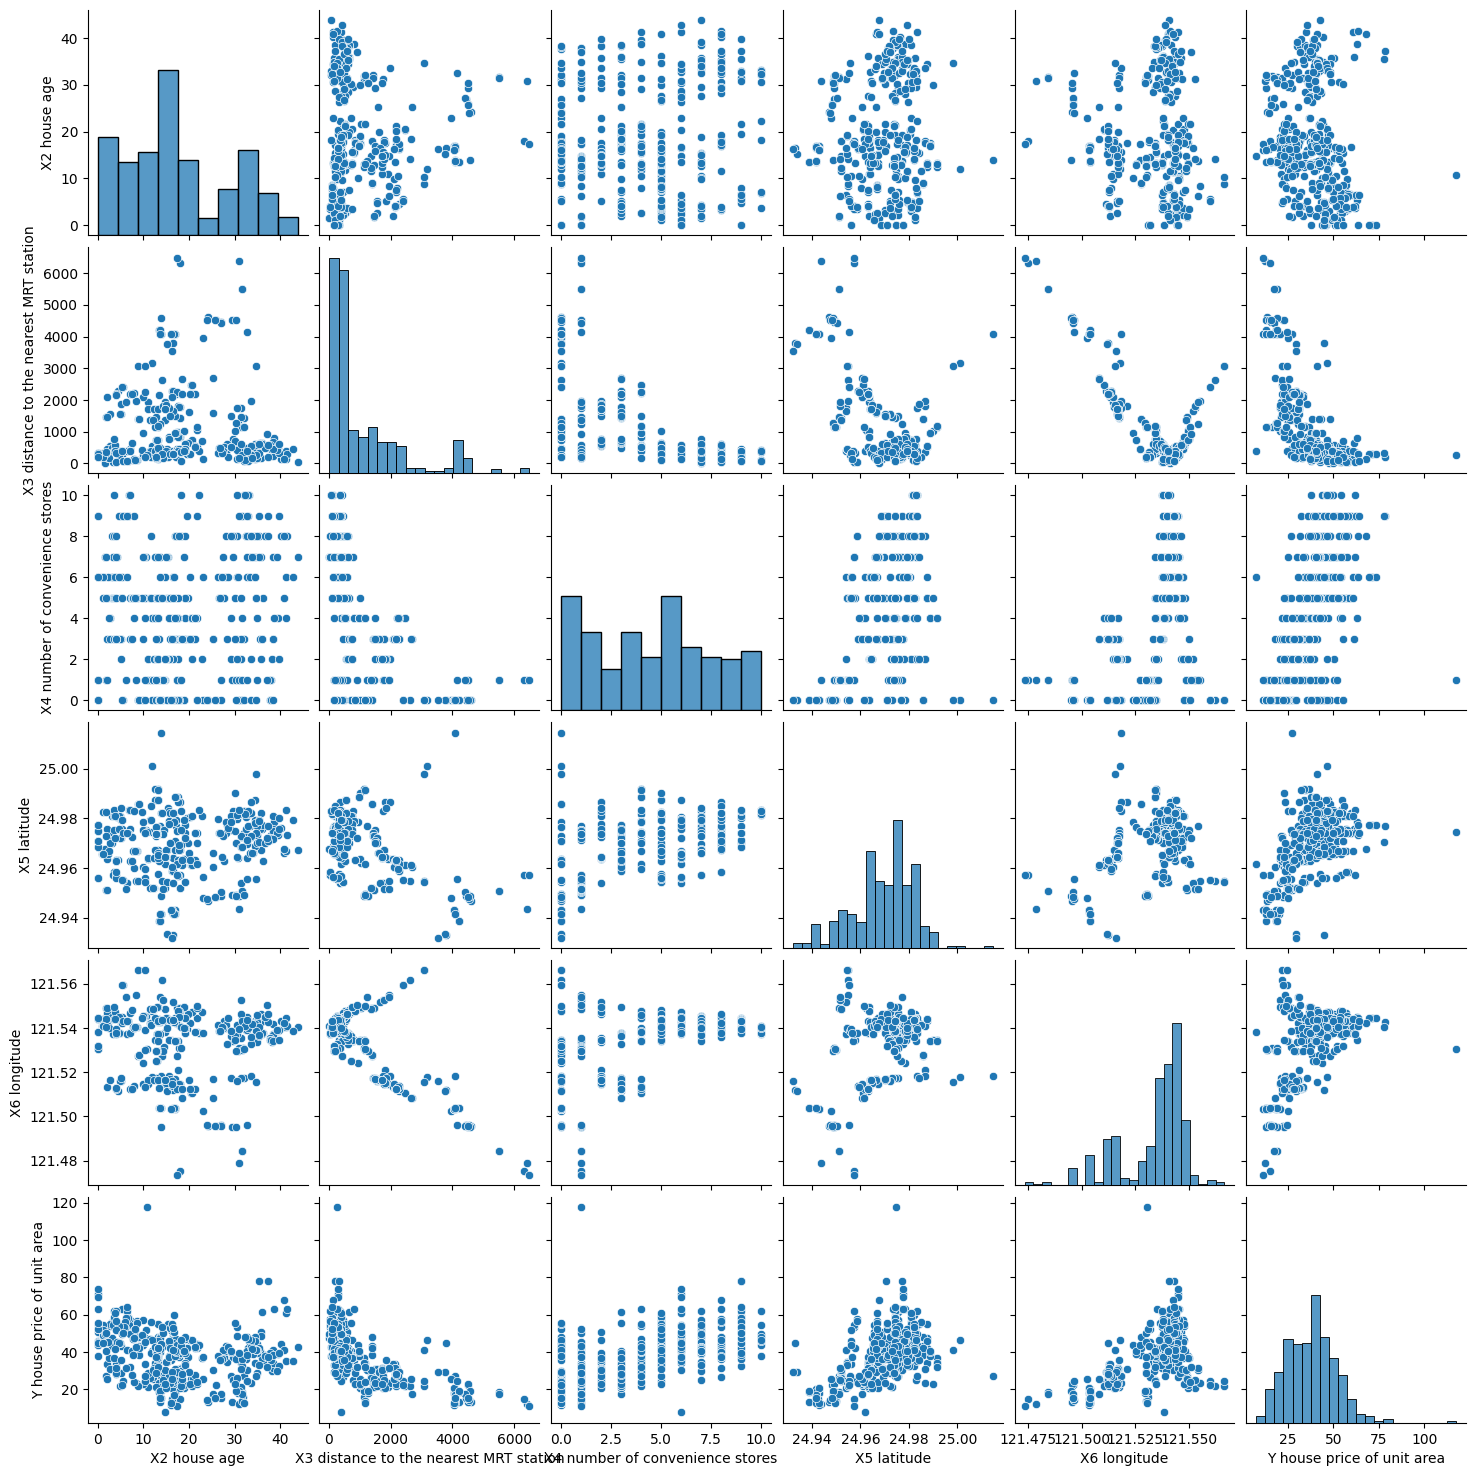

In [9]:
# pairplot
sns.pairplot(df)
plt.show()

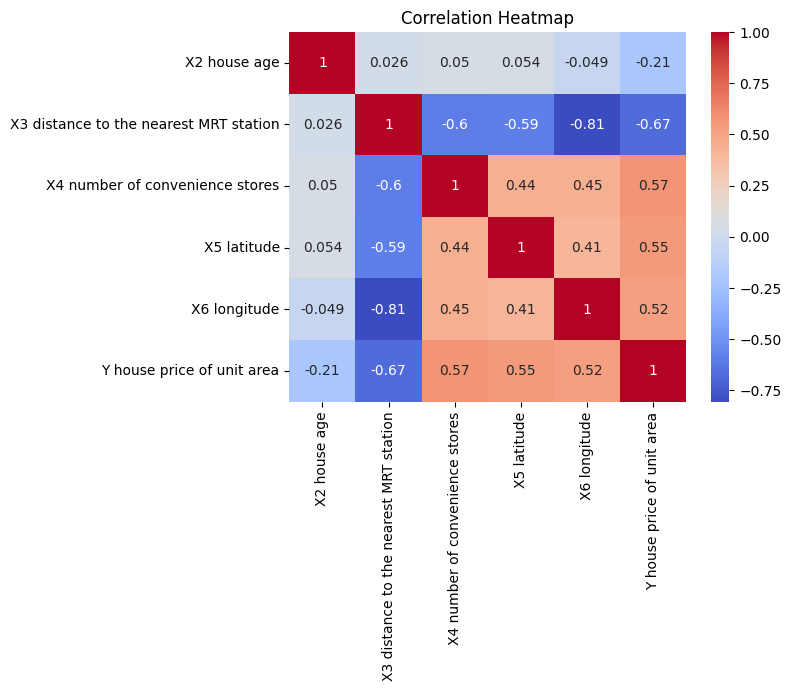

In [10]:
# correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
def evaluate(test, pred):
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)
    
    print(f"MSE: {mse},\tR-squared: {r2}")

In [12]:
# first, we scale the data to prevent high numbers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate(y_test, y_pred)

MSE: 54.58094520086213,	R-squared: 0.6746481382828176


## Polynomial Regression

In [14]:
# we test polynomial regression with degree 2 and 3

degree = 2
poly = PolynomialFeatures(degree)
X_train_poly2D = poly.fit_transform(X_train)
X_test_poly2D = poly.transform(X_test)

degree = 3
poly = PolynomialFeatures(degree)
X_train_poly3D = poly.fit_transform(X_train)
X_test_poly3D = poly.transform(X_test)

model2D = LinearRegression()
model2D.fit(X_train_poly2D, y_train)
y_pred = model2D.predict(X_test_poly2D)
print("Poly Reg. with degree 2:")
evaluate(y_test, y_pred)

model3D = LinearRegression()
model3D.fit(X_train_poly3D, y_train)
y_pred = model3D.predict(X_test_poly3D)
print("Poly Reg. with degree 3:")
evaluate(y_test, y_pred)

Poly Reg. with degree 2:
MSE: 41.850482438547004,	R-squared: 0.7505332250103935
Poly Reg. with degree 3:
MSE: 1352.3023621046684,	R-squared: -7.060946718605885


## Ridge Regression

In [15]:
# like polynomial regression, here we also use polynomial features to get better performance
# like before, we test degree 2 and 3

alpha = 1.0
ridge_model2D = Ridge(alpha=alpha)
ridge_model2D.fit(X_train_poly2D, y_train)
y_pred = ridge_model2D.predict(X_test_poly2D)
print("Ridge Poly Reg. with degree 2:")
evaluate(y_test, y_pred)

ridge_model3D = Ridge(alpha=alpha)
ridge_model3D.fit(X_train_poly3D, y_train)
y_pred = ridge_model3D.predict(X_test_poly3D)
print("Ridge Poly Reg. with degree 3:")
evaluate(y_test, y_pred)

Ridge Poly Reg. with degree 2:
MSE: 41.779600406771934,	R-squared: 0.750955746110302
Ridge Poly Reg. with degree 3:
MSE: 38.31535298765912,	R-squared: 0.7716057979390032


## Lasso Regression

In [16]:
# like polynomial regression, here we also use polynomial features to get better performance
# like before, we test degree 2 and 3

alpha = 1.0
lasso_model2D = Lasso(alpha=alpha)
lasso_model2D.fit(X_train_poly2D, y_train)
y_pred = lasso_model2D.predict(X_test_poly2D)
print("Lasso Poly Reg. with degree 2:")
evaluate(y_test, y_pred)

lasso_model3D = Lasso(alpha=alpha)
lasso_model3D.fit(X_train_poly3D, y_train)
y_pred = lasso_model3D.predict(X_test_poly3D)
print("Lasso Poly Reg. with degree 3:")
evaluate(y_test, y_pred)

Lasso Poly Reg. with degree 2:
MSE: 49.26467698158055,	R-squared: 0.7063379112643201
Lasso Poly Reg. with degree 3:
MSE: 51.11574200077375,	R-squared: 0.695303887431685


## Elastic Net Regression

In [17]:
# like polynomial regression, here we also use polynomial features to get better performance
# like before, we test degree 2 and 3

alpha = 1.0 # regularization strength
l1_ratio = 0.5  # mix ratio between Lasso and Ridge
elastic_net_model2D = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_model2D.fit(X_train_poly2D, y_train)
y_pred = elastic_net_model2D.predict(X_test_poly2D)
print("Elastic Net Poly Reg. with degree 2:")
evaluate(y_test, y_pred)

elastic_net_model3D = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_model3D.fit(X_train_poly3D, y_train)
y_pred = elastic_net_model3D.predict(X_test_poly3D)
print("Elastic Net Poly Reg. with degree 3:")
evaluate(y_test, y_pred)

Elastic Net Poly Reg. with degree 2:
MSE: 54.749288285421834,	R-squared: 0.6736446610479117
Elastic Net Poly Reg. with degree 3:
MSE: 53.3770367679112,	R-squared: 0.681824522798625


## XGBoost Regression 

In [18]:
# like polynomial regression, here we also use polynomial features to get better performance
# like before, we test degree 2 and 3

xgb_model2D = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model2D.fit(X_train_poly2D, y_train)
y_pred = xgb_model2D.predict(X_test_poly2D)
print("XGBoost Poly Reg. with degree 2:")
evaluate(y_test, y_pred)

xgb_model3D = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model3D.fit(X_train_poly3D, y_train)
y_pred = xgb_model3D.predict(X_test_poly3D)
print("XGBoost Poly Reg. with degree 3:")
evaluate(y_test, y_pred)

XGBoost Poly Reg. with degree 2:
MSE: 31.013609032849228,	R-squared: 0.8151308043443898
XGBoost Poly Reg. with degree 3:
MSE: 35.747301906691575,	R-squared: 0.7869137079999746


# Assosiation Rules

In [19]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [20]:
# 0. Import Libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Data Loading
df = pd.read_csv("grocery.csv", header=None, names=['transactions'])

# 2. Preprocess Data
df['transactions'] = df['transactions'].str.split(',')
transactions_list = df['transactions'].tolist()

# 3. Apply TransactionEncoder
te = TransactionEncoder()
te_arr = te.fit(transactions_list).transform(transactions_list)
df_encoded = pd.DataFrame(te_arr, columns=te.columns_)
df_encoded

# 4. Generate Frequent Itemsets
minsup = 0.2
frequent_itemsets = apriori(df_encoded, min_support=minsup, use_colnames=True)

# 5. Generate Association Rules
minconf = 0.6
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=minconf)

# 6. Display Rules
rules

antecedents consequents  antecedent support  consequent support  support  \
0        (MILK)     (BREAD)                0.25                0.65      0.2   
1       (SUGER)     (BREAD)                0.30                0.65      0.2   
2  (CORNFLAKES)    (COFFEE)                0.30                0.40      0.2   
3       (SUGER)    (COFFEE)                0.30                0.40      0.2   
4       (MAGGI)       (TEA)                0.25                0.35      0.2   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.800000  1.230769    0.0375        1.75       0.250000  
1    0.666667  1.025641    0.0050        1.05       0.035714  
2    0.666667  1.666667    0.0800        1.80       0.571429  
3    0.666667  1.666667    0.0800        1.80       0.571429  
4    0.800000  2.285714    0.1125        3.25       0.750000